In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import scipy.spatial.distance as ssd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

mpl.rcParams["lines.markeredgewidth"] = 0.0
mpl.rcParams['text.usetex'] = False

In [3]:
n_perms = 10
D = 3
n = 1
c = 1.0
randix = 0
N = (1/64)*1e6
L = 0.25
s = 1
#s2_res_fname = f"para/D={D}_n={float(n)}_N={N:.2e}_s={s:.5e}_L={float(L)}_c={float(c)}_r={randix}.csv"
#s2_res = pd.read_csv(s2_res_fname)
s2_res = pd.read_csv("nsc/D=3_n=0.5_N=1.00e+08_s=1.00000e-02_L=0.01_c=1.0_r=0.csv")

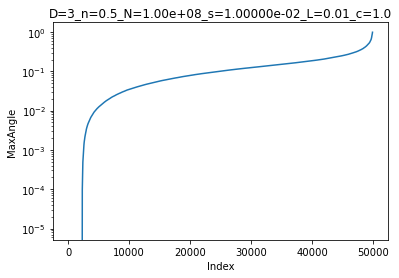

In [24]:
plt.figure()
ax = plt.semilogy(np.sort(s2_res.MaxAngle.values))
plt.gca().set_title(f"D=3_n=0.5_N=1.00e+08_s=1.00000e-02_L=0.01_c=1.0")
plt.gca().set_xlabel('Index')
plt.gca().set_ylabel('MaxAngle');

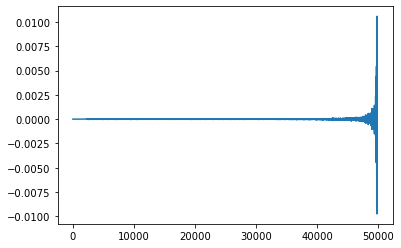

In [12]:
plt.plot(np.diff(np.diff(np.sort(s2_res.MaxAngle.values))))

In [25]:
s2_res.MaxAngle.max()

0.9893379999999999

<AxesSubplot:ylabel='Frequency'>

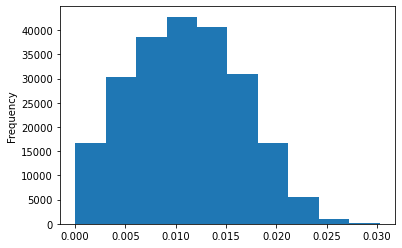

In [5]:
s2_res.OriginTime.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

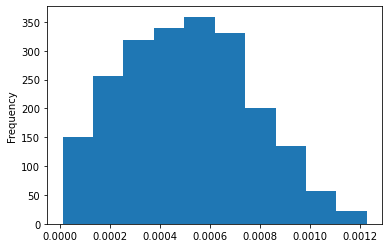

In [6]:
s2_res[s2_res.NumberSeen == 0].OriginTime.plot(kind='hist')

In [10]:
tdelta = 0.001
tintervals = np.arange(0, 1, tdelta)
tfreqs = np.zeros_like(tintervals)
for tix in range(tintervals.shape[0]):
    tmin = tintervals[tix]
    tmax = tmin + tdelta
    tfreqs[tix] = ((s2_res.NumberSeen == 0) & ((tmin < s2_res.OriginTime) & (s2_res.OriginTime < tmax))).sum()
tfreqs = tfreqs / tfreqs.sum()

(0.0, 0.01)

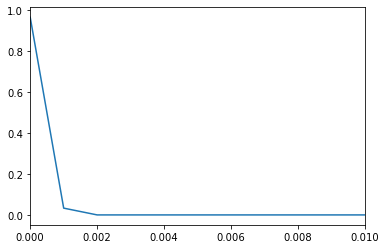

In [14]:
plt.plot(tintervals, tfreqs / tfreqs.sum())
plt.gca().set_xlim(0, 0.01)

In [16]:
np.mean(np.zeros((5,3)), axis=0).shape

(3,)